### Overview

The dataset of California Housing data has a total of 10 columns with 20640 records. The description of each column is as follows:

1. longitude: A number to represent how far the location is from the west. The higher the value, the farther the distance from the west.
2. latitude: A number to represent how far the location is from the north. The higher the value, the farther the distance from the north.
3. housing_median_age: Median age of the houses in the block. The smaller the age, the newer the house.
4. total_rooms: Total number of rooms in a block.
5. total_bedrooms: Total number of bedrooms in a block.
6. population: Total number of people residing in a block.
7. household: Total number of households in a unit, within a block.
8. median_income: Median income of the residents in the block respresented in tens of thousands of dollars.
9. median_house_value: Median house value of the housesin the block.
10. ocean_proximity: Indicates whether the block is close to the ocean or not.

The problem is to predict the median_house_value (target) based on other features (input) as accurate as possible and then to optimize the model using different algorithms and techniques.

### Importing libraries and dataset

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns

In [29]:
df = pd.read_csv("C:/Users/rijin/Downloads/housing.csv")
X = df.iloc[:,df.columns != 'median_house_value'].values
y = df.iloc[:,-2].values
X,y

(array([[-122.23, 37.88, 41.0, ..., 126.0, 8.3252, 'NEAR BAY'],
        [-122.22, 37.86, 21.0, ..., 1138.0, 8.3014, 'NEAR BAY'],
        [-122.24, 37.85, 52.0, ..., 177.0, 7.2574, 'NEAR BAY'],
        ...,
        [-121.22, 39.43, 17.0, ..., 433.0, 1.7, 'INLAND'],
        [-121.32, 39.43, 18.0, ..., 349.0, 1.8672, 'INLAND'],
        [-121.24, 39.37, 16.0, ..., 530.0, 2.3886, 'INLAND']], dtype=object),
 array([452600., 358500., 352100., ...,  92300.,  84700.,  89400.]))

In [30]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


###  Data Exploration

In [31]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [33]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [34]:
df.shape

(20640, 10)

In [35]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

As per above observations, there are null values in the dataset in column total_bedrooms. For regression, we cannot afford to keep null values, hence they must be dealt with.

In [36]:
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
imputer.fit(X[:,4:5])
X[:,4:5] = imputer.transform(X[:,4:5])
X

array([[-122.23, 37.88, 41.0, ..., 126.0, 8.3252, 'NEAR BAY'],
       [-122.22, 37.86, 21.0, ..., 1138.0, 8.3014, 'NEAR BAY'],
       [-122.24, 37.85, 52.0, ..., 177.0, 7.2574, 'NEAR BAY'],
       ...,
       [-121.22, 39.43, 17.0, ..., 433.0, 1.7, 'INLAND'],
       [-121.32, 39.43, 18.0, ..., 349.0, 1.8672, 'INLAND'],
       [-121.24, 39.37, 16.0, ..., 530.0, 2.3886, 'INLAND']], dtype=object)

In [37]:
print(pd.DataFrame(X).isna().sum())

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
dtype: int64


Replacing all the null values with the median of the total_bedrooms column. Here only one column has null values so even if we do not specify the column name with null values, it will do the job.

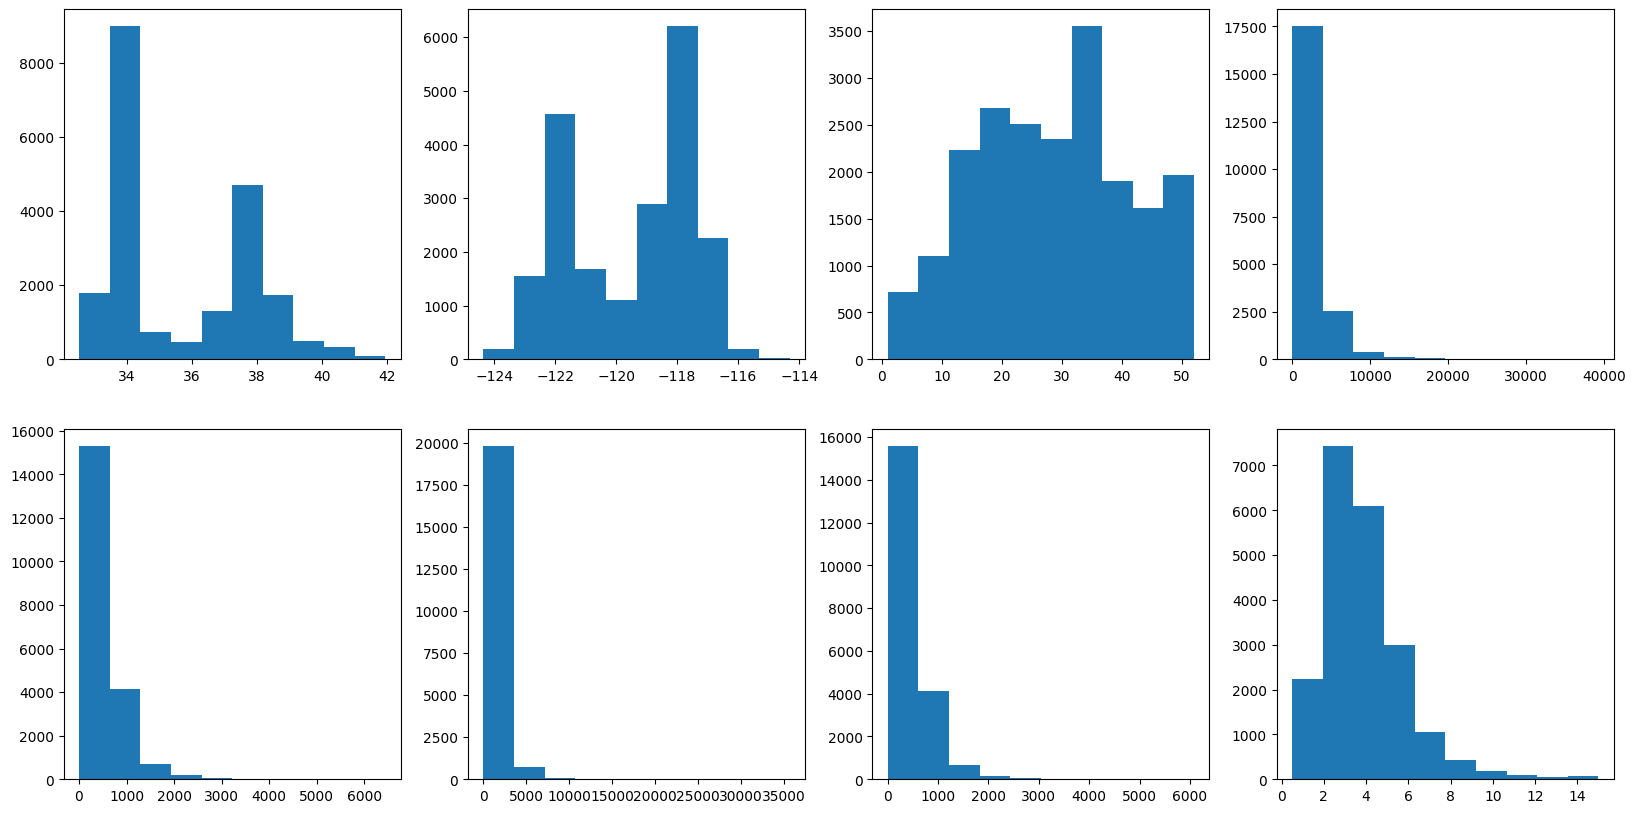

In [38]:
fig, axes = plt.subplots(2,4, figsize =(20,10))

axes[0][0].hist(df['latitude'])

axes[0][1].hist(df['longitude'])

axes[0][2].hist(df['housing_median_age'])

axes[0][3].hist(df['total_rooms'])

axes[1][0].hist(df['total_bedrooms'])

axes[1][1].hist(df['population'])

axes[1][2].hist(df['households'])

axes[1][3].hist(df['median_income'])

plt.show()

The above plots indicate that almost all the feature variables are skewed (mostly right skewed).

<Axes: >

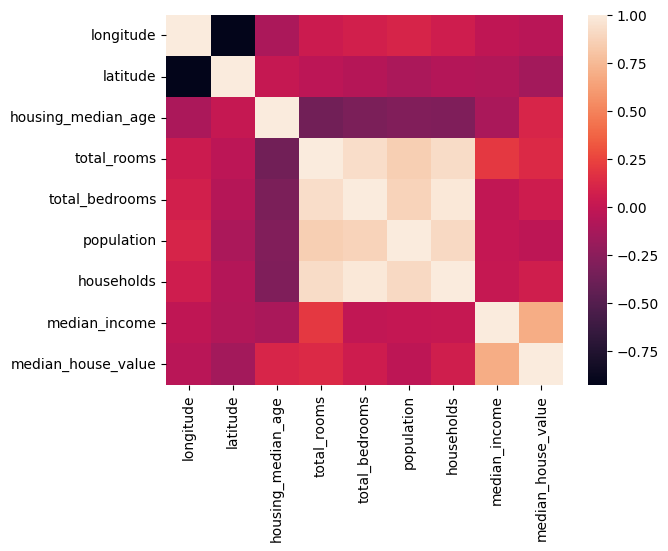

In [39]:
sns.heatmap(df.loc[:,'longitude':'median_house_value'].corr())

The highest correlation with the target variable i.e. median_house_value is median_income. There exists multicollinearity among feature variables which can cause problems with the signficance of variables for the algorithm, hence using feature selection or applying Ridge or Lasso algorithms can provide more accuracy.

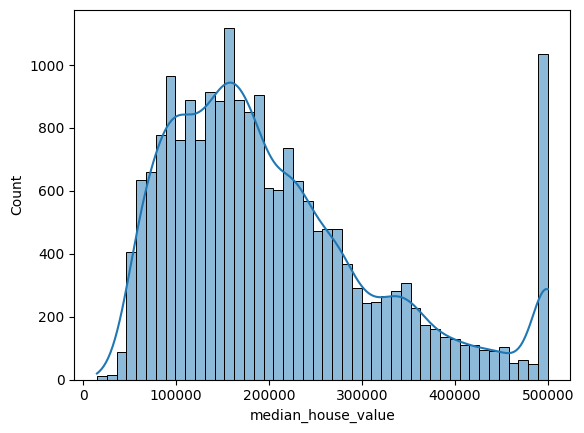

In [40]:
sns.histplot(df['median_house_value'], kde=True)
plt.show()

In [41]:
df['median_house_value'].describe()

count     20640.000000
mean     206855.816909
std      115395.615874
min       14999.000000
25%      119600.000000
50%      179700.000000
75%      264725.000000
max      500001.000000
Name: median_house_value, dtype: float64

From the above plot and summary statistics, we can say that the data is not normally distributed hence we may use transformations to make it distributed normally.

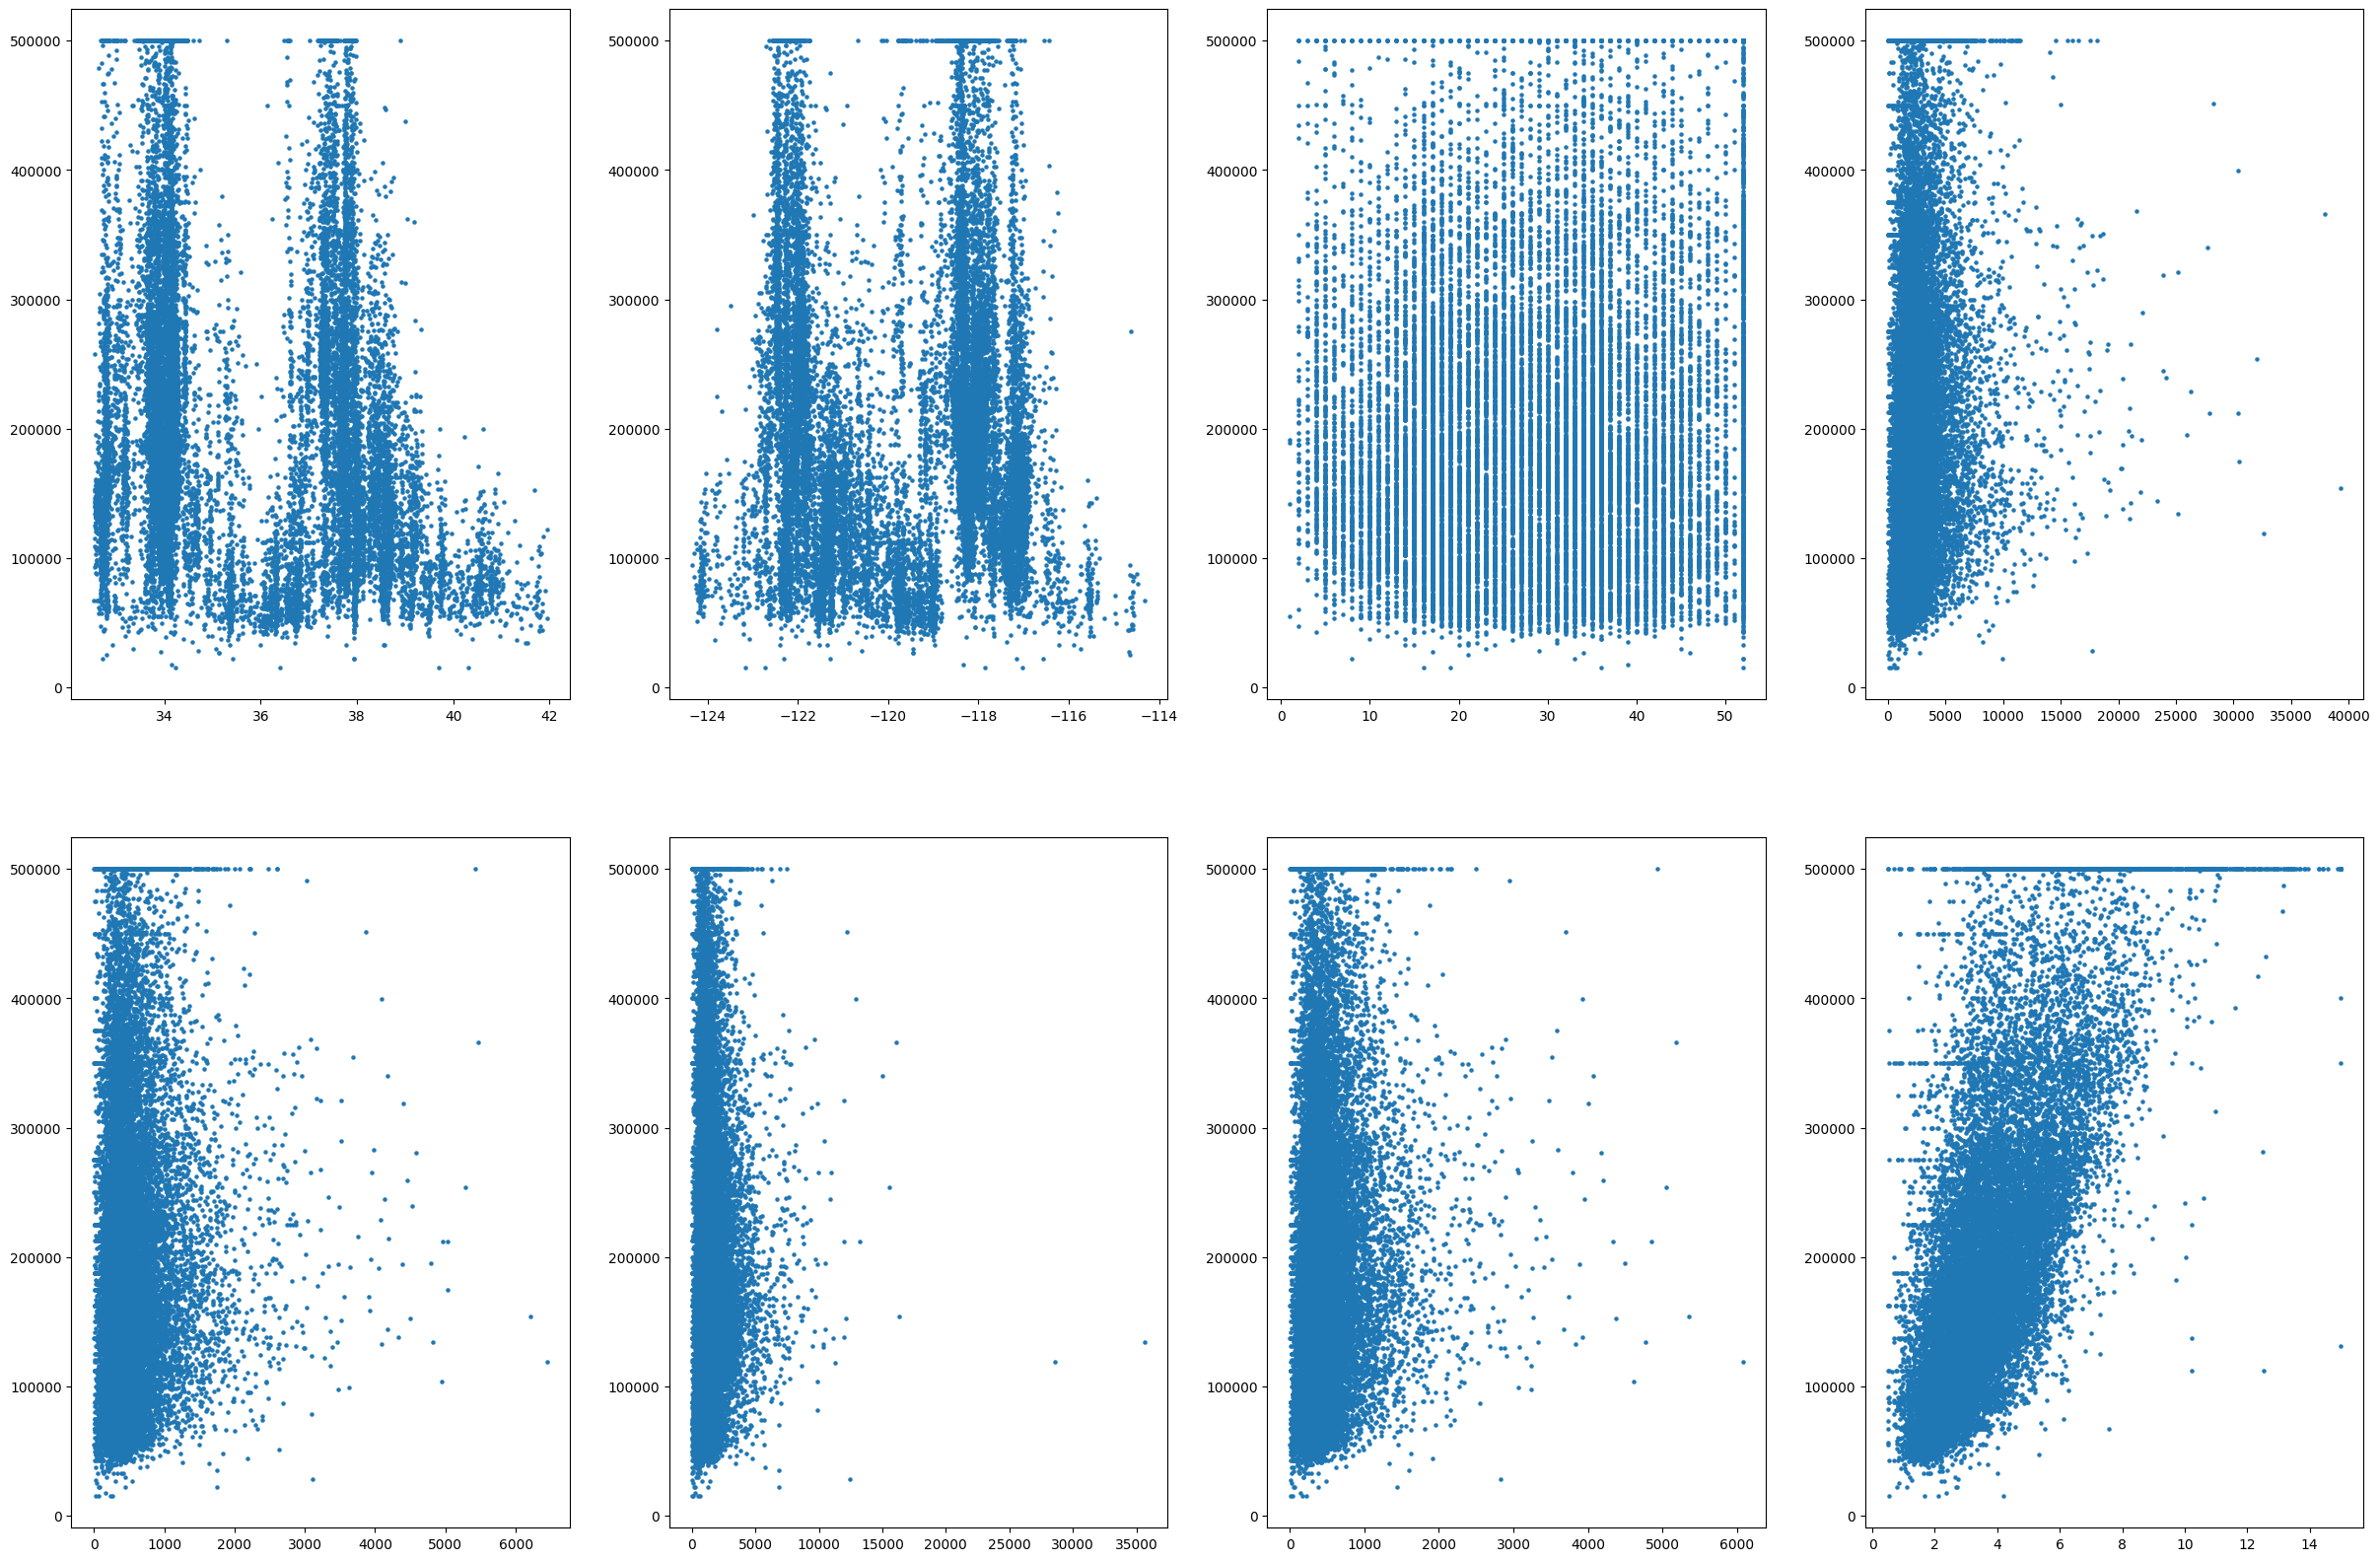

In [103]:
fig, axes = plt.subplots(2,4, figsize =(30,20))

axes[0][0].scatter(df['latitude'], df['median_house_value'], s=5)

axes[0][1].scatter(df['longitude'], df['median_house_value'], s=5)

axes[0][2].scatter(df['housing_median_age'], df['median_house_value'], s=5)

axes[0][3].scatter(df['total_rooms'], df['median_house_value'], s=5)

axes[1][0].scatter(df['total_bedrooms'], df['median_house_value'], s=5)

axes[1][1].scatter(df['population'], df['median_house_value'], s=5)

axes[1][2].scatter(df['households'], df['median_house_value'], s=5)

axes[1][3].scatter(df['median_income'], df['median_house_value'], s=5)

plt.show()

### One Hot Encoding the ocean_proximity feature

From the dataset.head(), it is clear that the last column 'ocean_proximity' is of type categorical and LinearRegression assumes that all the data that it receives is of type numerical. To solve this, we may use One Hot Encoding to convert the categorical values to numerical values(binary). We must also make sure to drop one of the dummy columns(encoded columns) to avoid dummy trap.

In [42]:
ct = ColumnTransformer([('encoder', OneHotEncoder(drop='first'), [8])], remainder='passthrough')
X = np.array(ct.fit_transform(X))
X

array([[0.0, 0.0, 1.0, ..., 322.0, 126.0, 8.3252],
       [0.0, 0.0, 1.0, ..., 2401.0, 1138.0, 8.3014],
       [0.0, 0.0, 1.0, ..., 496.0, 177.0, 7.2574],
       ...,
       [1.0, 0.0, 0.0, ..., 1007.0, 433.0, 1.7],
       [1.0, 0.0, 0.0, ..., 741.0, 349.0, 1.8672],
       [1.0, 0.0, 0.0, ..., 1387.0, 530.0, 2.3886]], dtype=object)

### Train Test split

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)
X_train

array([[0.0, 0.0, 0.0, ..., 2300.0, 623.0, 3.2596],
       [0.0, 0.0, 0.0, ..., 1314.0, 756.0, 3.8125],
       [0.0, 0.0, 0.0, ..., 915.0, 336.0, 4.1563],
       ...,
       [0.0, 0.0, 0.0, ..., 1756.0, 527.0, 2.9344],
       [0.0, 0.0, 0.0, ..., 1777.0, 559.0, 5.7192],
       [0.0, 0.0, 1.0, ..., 2619.0, 1242.0, 2.5755]], dtype=object)

### Model

In [44]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [45]:
y_pred = regressor.predict(X_test)
y_pred

array([ 54055.44889902, 124225.33893719, 255489.37949163, ...,
       439180.98341178, 120797.55240622, 183386.04993588])

In [46]:
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(-1,1), y_test.reshape(len(y_test),1)),axis = 1))

[[ 54055.45  47700.  ]
 [124225.34  45800.  ]
 [255489.38 500001.  ]
 ...
 [439180.98 500001.  ]
 [120797.55  72300.  ]
 [183386.05 151500.  ]]


In [47]:
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred)
score

0.6254240620553703

In [50]:
print("Coefficient: ",regressor.coef_,"\nIntercept: ", regressor.intercept_)

Coefficient:  [-3.98e+04  1.36e+05 -5.14e+03  3.43e+03 -2.68e+04 -2.55e+04  1.10e+03
 -6.02e+00  1.03e+02 -3.82e+01  4.83e+01  3.95e+04] 
Intercept:  -2275547.3817163478


The r2 score for the LinearRegression model is about 63% which means we can predict the dependent variable using the independent variable with an accuracy of 63%. There are 12 coefficients for 12 features which represents the change in the dependent variable when 1 unit of independent variable is increased. The intercept value is where all the expected value of y where all the feature variables are equal to 0. 

### Improving the model

To improve the model, we may try using Polynomial Regression or other Regression techniques such Ridge and Lasso Regression. We can also try scaling the features by standardizing the variables.

In [51]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

In [56]:
X_poly_train

array([[ 0.  , -0.68, -0.02, ..., -0.07, -0.19, -0.3 ],
       [ 0.  , -0.68, -0.02, ...,  0.13,  0.13, -0.22],
       [ 0.  , -0.68, -0.02, ..., -0.24, -0.25, -0.15],
       ...,
       [ 0.  , -0.68, -0.02, ..., -0.16, -0.34, -0.33],
       [ 0.  , -0.68, -0.02, ...,  0.05,  0.67,  0.29],
       [ 0.  , -0.68, -0.02, ...,  0.52, -0.07, -0.36]])

In [54]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_poly_train = sc.fit_transform(X_poly_train)
X_poly_test = sc.transform(X_poly_test)

In [57]:
poly_regressor = LinearRegression()
poly_regressor.fit(X_poly_train, y_train)

LinearRegression()

In [59]:
y_poly_pred = poly_regressor.predict(X_poly_test)

In [63]:
print(np.concatenate((y_test.reshape(-1,1), y_poly_pred.reshape(-1,1)), axis = 1))

[[ 47700.    57466.09]
 [ 45800.    91482.87]
 [500001.   197433.33]
 ...
 [500001.   459811.68]
 [ 72300.    83280.6 ]
 [151500.   186160.08]]


In [64]:
print(r2_score(y_test, y_poly_pred))

-2.344116278441436e+23


In [65]:
from sklearn.linear_model import Ridge
ridgeRegressor = Ridge(alpha=1).fit(X_poly_train, y_train)

In [66]:
y_ridge_pred = ridgeRegressor.predict(X_poly_test)

In [67]:
print(np.concatenate((y_test.reshape(-1,1), y_ridge_pred.reshape(-1,1)), axis = 1))

[[ 47700.    81764.48]
 [ 45800.    87695.11]
 [500001.   243727.01]
 ...
 [500001.   462436.81]
 [ 72300.   102125.36]
 [151500.   176806.08]]


In [68]:
print(r2_score(y_test, y_ridge_pred))

0.6676343742112041


In [69]:
from sklearn.linear_model import Lasso
lassoRegressor = Lasso(alpha=50, max_iter=1000, tol=0.1)
lassoRegressor.fit(X_poly_train,y_train)

Lasso(alpha=50, tol=0.1)

In [70]:
y_lasso_pred = lassoRegressor.predict(X_poly_test)

In [71]:
print(r2_score(y_test, y_lasso_pred))

0.6749941081255991


### Key Results

The OLS algorithm can perform well on the training data but may produce inaccurate results on the test data. The Ridge and Lasso algorithm is more robust as it will have a low training score but the validation/test scores will be high due to the biasness we add to the algorithm.

The Lasso Algorithm is giving the best r2_score as it does have variable selection and assigns zero value to the coefficients.

#### Linear Regression Actual vs Predicted

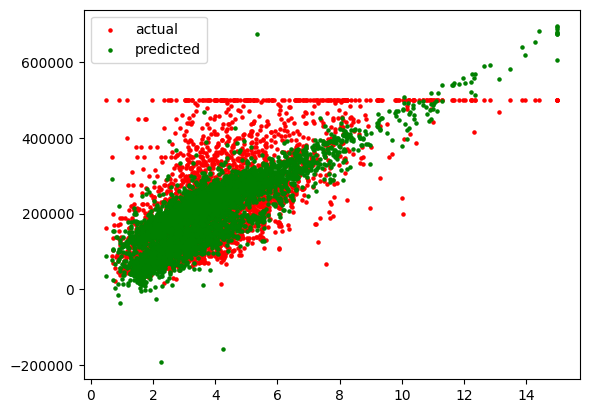

In [92]:
plt.scatter(X_test[:,11], y_test, s=5, c='Red', label = 'actual')
plt.scatter(X_test[:,11], y_pred, s=5, c='Green', label = 'predicted')
plt.legend()
plt.show()

We can utilize transformations in the future to further improve the accuracy as transformations are helpful in removing skewness and algorithms work better with data in Gaussian Distribution.